In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids

# Load data from CSV file
data = pd.read_csv('Data Process.csv', sep=';')

# Exclude the first data row
data = data.iloc[1:]

# Replace commas (,) with periods (.) and convert to float
data['Peng Sem 1'] = data['Peng Sem 1'].str.replace(',', '.').astype(float)
data['Peng Sem 2'] = data['Peng Sem 2'].str.replace(',', '.').astype(float)
data['Ket Sem 1'] = data['Ket Sem 1'].str.replace(',', '.').astype(float)
data['Ket Sem 2'] = data['Ket Sem 2'].str.replace(',', '.').astype(float)

# Extract attributes from the data
attributes = ['Nama', 'Peng Sem 1', 'Ket Sem 1', 'Peng Sem 2', 'Ket Sem 2']
X = data[attributes].values

# Perform pairwise distance calculation
distances = pairwise_distances(X[:, 1:], metric='euclidean')

# Function to calculate the total dissimilarity for a given medoid index
def total_dissimilarity(index, medoids):
    cluster_indices = np.where(medoids)[0]
    cluster_points = X[cluster_indices]
    cluster_distances = distances[cluster_indices][:, cluster_indices]
    return sum(cluster_distances)

# Function to find the best medoid with the lowest dissimilarity
def find_best_medoid(cluster_points, cluster_indices):
    best_medoid = None
    best_dissimilarity = float('inf')
    for i in range(len(cluster_points)):
        dissimilarity = total_dissimilarity(i, cluster_indices)
        if np.all(dissimilarity < best_dissimilarity):
            best_medoid = cluster_indices[i]  # Update with cluster index
            best_dissimilarity = dissimilarity
    return best_medoid, best_dissimilarity

# Perform K-Medoids clustering
k = 3  # Number of clusters
medoids_indices = KMedoids(n_clusters=k, random_state=0).fit_predict(distances)

# Find the best medoid for each cluster
medoids = []
for cluster_id in range(k):
    cluster_indices = np.where(medoids_indices == cluster_id)[0]
    cluster_points = X[cluster_indices]
    medoid_index, _ = find_best_medoid(cluster_points, cluster_indices)
    medoids.append(medoid_index)

# Retrieve all attributes from data
all_attributes = X

# Create a new DataFrame with cluster assignments
cluster_data = pd.DataFrame(all_attributes, columns=attributes)
cluster_data['Cluster'] = medoids_indices + 1

# Save the DataFrame to a new CSV file
cluster_data.to_csv('Clustered_Data.csv', index=False)
cluster_counts = cluster_data['Cluster'].value_counts()
print(cluster_counts)

2    95
1    85
3    66
Name: Cluster, dtype: int64


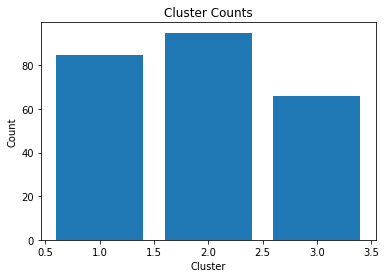

In [19]:
import matplotlib.pyplot as plt

# Plotting the cluster counts
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')
plt.show()

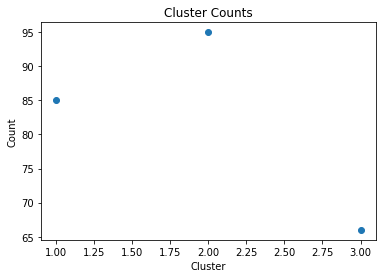

In [20]:
import matplotlib.pyplot as plt

# Generate scatter plot for cluster counts
plt.scatter(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')
plt.show()